# BUGSrad Visualization Notebook
1. Plot Profile Quantities
2. Run BUGSrad
3. Display Flux Profile

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [93]:
profFile = '../profiles/input/profile_fiona2_20_ar.txt'
f = open(profFile, 'r')
lines = f.readlines()
nlev = len(lines)
varN = ['z','p','t','q','ql','qi','qr']
varU = ['km','hPa','K','kg/kg','kg/kg','kg/kg','kg/kg']
z = []
p = []
t = []
q = []
ql = []
qi = []
qr = []
for i in range(nlev):
    z.append(float((lines[i].split(','))[0]))
    p.append(float((lines[i].split(','))[1]))
    t.append(float((lines[i].split(','))[2]))
    q.append(float((lines[i].split(','))[3]))
    ql.append(float((lines[i].split(','))[4]))
    qi.append(float((lines[i].split(','))[5]))
    qr.append(float((lines[i].split(','))[6]))
z = np.asarray(z)
p = np.asarray(p)
t = np.asarray(t)
q = np.asarray(q)
ql = np.asarray(ql)
qi = np.asarray(qi)
qr = np.asarray(qr)
f.close()

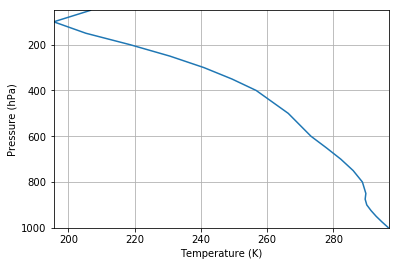

In [94]:
#Temperature profile
plt.figure(1)
plt.axis([np.min(t),np.max(t),np.max(p),np.min(p)])
plt.plot(t,p)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Temperature (K)')
plt.grid(True)
plt.show()

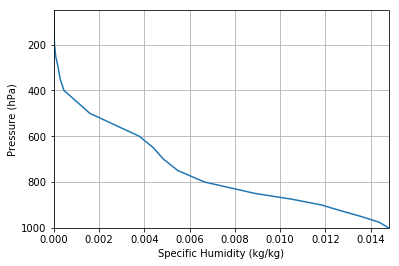

In [95]:
#Humidity profile
plt.figure(1)
plt.axis([0,np.max(q),np.max(p),np.min(p)])
plt.plot(q,p)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Specific Humidity (kg/kg)')
plt.grid(True)
plt.show()

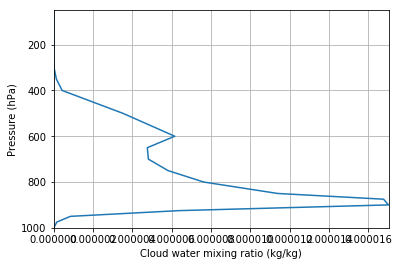

In [96]:
#Liquid Cloud Water Content profile
plt.figure(1)
plt.axis([0,np.max(ql),np.max(p),np.min(p)])
plt.plot(ql,p)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Cloud water mixing ratio (kg/kg)')
plt.grid(True)
plt.show()

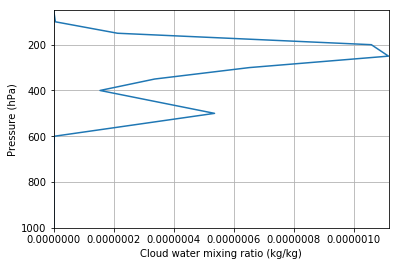

In [97]:
#Ice Cloud Water Content profile
plt.figure(1)
plt.axis([0,np.max(qi),np.max(p),np.min(p)])
plt.plot(qi,p)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Cloud water mixing ratio (kg/kg)')
plt.grid(True)
plt.show()

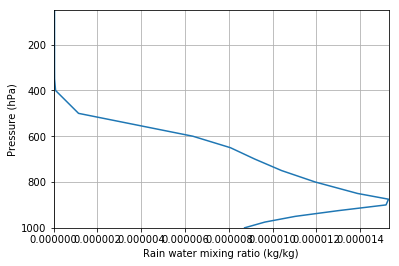

In [98]:
#Rain Water Content profile
plt.figure(1)
plt.axis([0,np.max(qr),np.max(p),np.min(p)])
plt.plot(qr,p)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Rain water mixing ratio (kg/kg)')
plt.grid(True)
plt.show()

# Run BUGSrad

In [99]:
BUGSrad_exe = '../code/process_bugsrad'
BUGSrad_File = '../profiles/output/bugsrad.txt'
print(BUGSrad_exe+' '+profFile+' '+BUGSrad_File)
os.system(BUGSrad_exe+' '+profFile+' '+BUGSrad_File)

../code/process_bugsrad ../profiles/input/profile_fiona2_20_ar.txt ../profiles/output/bugsrad.txt


32512

In [100]:
#Read BUGSrad File
f = open(BUGSrad_File, 'r')
lines = f.readlines()
nlev = len(lines)
swdn = []
swup = []
lwdn = []
lwup = []
swdn_clr = []
swup_clr = []
lwdn_clr = []
lwup_clr = []
for i in range(2,nlev):
    swdn.append(float((lines[i].split(','))[1]))
    swup.append(float((lines[i].split(','))[2]))
    lwdn.append(float((lines[i].split(','))[3]))
    lwup.append(float((lines[i].split(','))[4]))
    swdn_clr.append(float((lines[i].split(','))[5]))
    swup_clr.append(float((lines[i].split(','))[6]))
    lwdn_clr.append(float((lines[i].split(','))[7]))
    lwup_clr.append(float((lines[i].split(','))[8]))
swdn = np.asarray(swdn)
swup = np.asarray(swup)
lwdn = np.asarray(lwdn)
lwup = np.asarray(lwup)
swdn_clr = np.asarray(swdn_clr)
swup_clr = np.asarray(swup_clr)
lwdn_clr = np.asarray(lwdn_clr)
lwup_clr = np.asarray(lwup_clr)
f.close()

In [101]:
LID = 0
print('TOA SHORTWAVE DOWNWELLING = ',swdn[LID],'W/m^2')
print('TOA SHORTWAVE UPWELLING = ',swup[LID],'W/m^2')
print('TOA LONGWAVE DOWNWELLING = ',lwdn[LID],'W/m^2')
print('TOA LONGWAVE UPWELLING = ',lwup[LID],'W/m^2')
print('TOA SHORTWAVE DOWNWELLING (CLEARSKY) = ',swdn_clr[LID],'W/m^2')
print('TOA SHORTWAVE UPWELLING (CLEARSKY) = ',swup_clr[LID],'W/m^2')
print('TOA LONGWAVE DOWNWELLING (CLEARSKY) = ',lwdn_clr[LID],'W/m^2')
print('TOA LONGWAVE UPWELLING (CLEARSKY) = ',lwup_clr[LID],'W/m^2')

TOA SHORTWAVE DOWNWELLING =  1361.0 W/m^2
TOA SHORTWAVE UPWELLING =  379.3 W/m^2
TOA LONGWAVE DOWNWELLING =  0.0 W/m^2
TOA LONGWAVE UPWELLING =  228.4 W/m^2
TOA SHORTWAVE DOWNWELLING (CLEARSKY) =  1361.0 W/m^2
TOA SHORTWAVE UPWELLING (CLEARSKY) =  211.6 W/m^2
TOA LONGWAVE DOWNWELLING (CLEARSKY) =  0.0 W/m^2
TOA LONGWAVE UPWELLING (CLEARSKY) =  277.3 W/m^2


In [102]:
LID = len(swdn)-1
print('BOA SHORTWAVE DOWNWELLING = ',swdn[LID],'W/m^2')
print('BOA SHORTWAVE UPWELLING = ',swup[LID],'W/m^2')
print('BOA LONGWAVE DOWNWELLING = ',lwdn[LID],'W/m^2')
print('BOA LONGWAVE UPWELLING = ',lwup[LID],'W/m^2')
print('BOA SHORTWAVE DOWNWELLING (CLEARSKY) = ',swdn_clr[LID],'W/m^2')
print('BOA SHORTWAVE UPWELLING (CLEARSKY) = ',swup_clr[LID],'W/m^2')
print('BOA LONGWAVE DOWNWELLING (CLEARSKY) = ',lwdn_clr[LID],'W/m^2')
print('BOA LONGWAVE UPWELLING (CLEARSKY) = ',lwup_clr[LID],'W/m^2')

BOA SHORTWAVE DOWNWELLING =  853.7 W/m^2
BOA SHORTWAVE UPWELLING =  128.1 W/m^2
BOA LONGWAVE DOWNWELLING =  435.8 W/m^2
BOA LONGWAVE UPWELLING =  454.7 W/m^2
BOA SHORTWAVE DOWNWELLING (CLEARSKY) =  1086.5 W/m^2
BOA SHORTWAVE UPWELLING (CLEARSKY) =  163.0 W/m^2
BOA LONGWAVE DOWNWELLING (CLEARSKY) =  396.2 W/m^2
BOA LONGWAVE UPWELLING (CLEARSKY) =  454.7 W/m^2


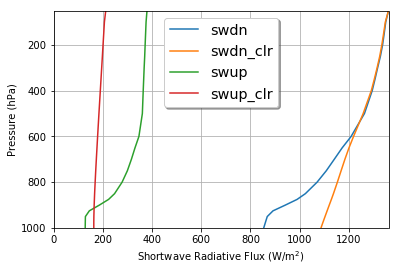

In [103]:
#Shortwave Radiative Fluxes
plt.figure(1)
plt.axis([0,np.max(swdn),np.max(p),np.min(p)])
plt.plot(swdn,p,label='swdn')
plt.plot(swdn_clr,p,label='swdn_clr')
plt.plot(swup,p,label='swup')
plt.plot(swup_clr,p,label='swup_clr')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Shortwave Radiative Flux (W/m$^2$)')
plt.grid(True)
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

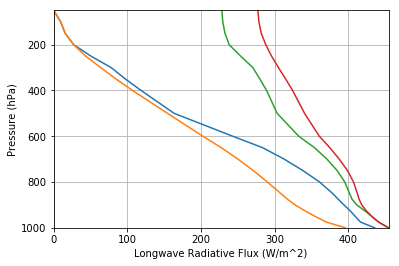

In [104]:
#Longwave Radiative Fluxes
plt.figure(1)
plt.axis([0,np.max(lwup),np.max(p),np.min(p)])
plt.plot(lwdn,p)
plt.plot(lwdn_clr,p)
plt.plot(lwup,p)
plt.plot(lwup_clr,p)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Longwave Radiative Flux (W/m^2)')
plt.grid(True)
plt.show()